In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [3]:
sp500_index_df = pd.read_csv("/content/Mydrive/MyDrive/ML Data/df_sp500_idx.csv")
sp500_index_df = sp500_index_df.iloc[: , 1:]
sp500_stocks_df = pd.read_csv("/content/Mydrive/MyDrive/ML Data/sp500_closing_2012_11_5_2022_11_5.csv")

In [4]:
sp500_stocks_df = sp500_stocks_df[(sp500_stocks_df["Date"] >= "2017-12-01")&(sp500_stocks_df["Date"] <= "2018-06-31")]
sp500_stocks_df

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1278,2017-12-01,66.097054,47.758636,94.261108,40.662849,76.362892,78.534782,194.600006,51.560780,31.620001,...,149.752426,44.558552,64.688507,63.259083,65.167503,76.674538,107.004723,110.360001,44.037563,70.106194
1279,2017-12-04,63.739532,48.665081,98.761520,40.365688,75.490807,80.818260,189.570007,50.391045,31.209999,...,148.867157,44.315643,64.773781,62.943165,64.940865,76.591812,107.238228,109.510002,45.497272,68.865051
1280,2017-12-05,63.345001,48.216736,96.036591,40.327652,75.641441,79.403816,187.960007,50.464722,30.903334,...,150.166824,44.072708,64.246727,62.809147,64.062637,76.398735,107.863991,107.360001,44.741035,68.700180
1281,2017-12-06,63.402760,48.353191,92.571098,40.177891,74.840729,79.496262,187.000000,50.344997,30.953333,...,148.659958,44.324310,63.773926,62.703854,64.194870,76.527435,108.134842,105.309998,43.896858,68.816536
1282,2017-12-07,64.191780,49.591015,92.675545,40.251587,74.713844,79.440796,187.910004,50.372620,30.616667,...,149.667648,44.107414,63.983192,62.215611,64.572578,76.352791,107.200851,107.669998,44.380508,69.466217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,2018-06-25,59.151901,38.839745,130.534195,43.650589,75.069214,85.964180,416.200012,56.511040,26.610001,...,157.942200,40.174934,63.070065,42.962811,62.944511,72.901070,103.855064,142.210007,48.425167,82.385681
1419,2018-06-26,59.905811,38.262241,130.343994,44.192120,74.318924,84.258324,428.369995,56.548237,26.410000,...,158.568115,40.335098,63.781929,42.521072,63.238960,74.218285,105.571465,143.220001,47.893311,81.714561
1420,2018-06-27,59.093906,37.449814,127.786041,44.127422,73.826782,83.726997,410.640015,56.250664,26.270000,...,155.447983,40.655434,64.628220,42.213779,63.068001,73.160805,103.226669,141.759995,47.024620,81.082314
1421,2018-06-28,59.238895,37.391090,128.480194,44.448509,74.569016,80.259346,413.940002,56.975998,26.420000,...,155.542831,40.628735,64.833878,41.990551,63.001511,72.251732,104.589622,143.309998,47.130985,82.512161


In [5]:
#Get count of missing values in sp500 index df
pct_na_sp500_index = sp500_index_df.isna().sum()
pct_na_sp500_index.head()

Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64

In [6]:
#Get percentage of missing values for each sp500 stock
pct_na_sp500_stocks = (sp500_stocks_df.isna().sum().sort_values(ascending=False)/(len(sp500_stocks_df)))
pct_na_sp500_stocks.head(20)

CARR    1.000000
DOW     1.000000
OGN     1.000000
FOX     1.000000
FOXA    1.000000
CEG     1.000000
CTVA    1.000000
OTIS    1.000000
MRNA    1.000000
CDAY    0.682759
VICI    0.137931
NDSN    0.000000
NEE     0.000000
NWL     0.000000
NVR     0.000000
MTCH    0.000000
NVDA    0.000000
MTD     0.000000
NUE     0.000000
NTRS    0.000000
dtype: float64

In [7]:

na_by_date_series = sp500_stocks_df.isnull().sum(axis=1)
na_date = {'Date': pd.DatetimeIndex(sp500_stocks_df['Date']),
                'na_count': na_by_date_series}
na_date_df = pd.DataFrame(na_date)
na_date_df

,Date,na_count
1278,2017-12-01,11
1279,2017-12-04,11
1280,2017-12-05,11
1281,2017-12-06,11
1282,2017-12-07,11
...,...,...
1418,2018-06-25,9
1419,2018-06-26,9
1420,2018-06-27,9
1421,2018-06-28,9


Text(0.5, 1.0, 'S&P 500 Stocks NULL Counts')

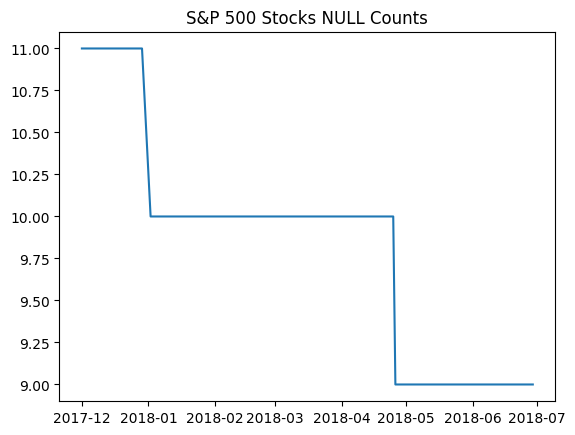

In [8]:
plt.plot(na_date_df["Date"], na_date_df["na_count"])
plt.title("S&P 500 Stocks NULL Counts")

In [9]:
#Get date whereby at least 95% of stocks have no missing data
for index, row in sp500_stocks_df.iterrows():
    if row.isnull().sum()/len(sp500_stocks_df.columns) <= 0.05:
        print(row["Date"])
        break

2017-12-01


In [10]:
#Take only the rows after this date and drop all columns with nan values
sp500_stocks_df_clean = sp500_stocks_df[(sp500_stocks_df["Date"] >= "2017-12-01")&(sp500_stocks_df["Date"] <= "2018-06-30")]
sp500_stocks_df_clean=sp500_stocks_df_clean.dropna(axis=1)
sp500_stocks_df_clean.isna().sum().sum()
sp500_stocks_df_clean

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1278,2017-12-01,66.097054,47.758636,94.261108,40.662849,76.362892,78.534782,194.600006,51.560780,31.620001,...,149.752426,44.558552,64.688507,63.259083,65.167503,76.674538,107.004723,110.360001,44.037563,70.106194
1279,2017-12-04,63.739532,48.665081,98.761520,40.365688,75.490807,80.818260,189.570007,50.391045,31.209999,...,148.867157,44.315643,64.773781,62.943165,64.940865,76.591812,107.238228,109.510002,45.497272,68.865051
1280,2017-12-05,63.345001,48.216736,96.036591,40.327652,75.641441,79.403816,187.960007,50.464722,30.903334,...,150.166824,44.072708,64.246727,62.809147,64.062637,76.398735,107.863991,107.360001,44.741035,68.700180
1281,2017-12-06,63.402760,48.353191,92.571098,40.177891,74.840729,79.496262,187.000000,50.344997,30.953333,...,148.659958,44.324310,63.773926,62.703854,64.194870,76.527435,108.134842,105.309998,43.896858,68.816536
1282,2017-12-07,64.191780,49.591015,92.675545,40.251587,74.713844,79.440796,187.910004,50.372620,30.616667,...,149.667648,44.107414,63.983192,62.215611,64.572578,76.352791,107.200851,107.669998,44.380508,69.466217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,2018-06-25,59.151901,38.839745,130.534195,43.650589,75.069214,85.964180,416.200012,56.511040,26.610001,...,157.942200,40.174934,63.070065,42.962811,62.944511,72.901070,103.855064,142.210007,48.425167,82.385681
1419,2018-06-26,59.905811,38.262241,130.343994,44.192120,74.318924,84.258324,428.369995,56.548237,26.410000,...,158.568115,40.335098,63.781929,42.521072,63.238960,74.218285,105.571465,143.220001,47.893311,81.714561
1420,2018-06-27,59.093906,37.449814,127.786041,44.127422,73.826782,83.726997,410.640015,56.250664,26.270000,...,155.447983,40.655434,64.628220,42.213779,63.068001,73.160805,103.226669,141.759995,47.024620,81.082314
1421,2018-06-28,59.238895,37.391090,128.480194,44.448509,74.569016,80.259346,413.940002,56.975998,26.420000,...,155.542831,40.628735,64.833878,41.990551,63.001511,72.251732,104.589622,143.309998,47.130985,82.512161


In [11]:
#Since LSTM's can't accurately forcast returns data, we will use the min-max scaled price data instead WE NEED TO TRY BOTH
from sklearn.preprocessing import MinMaxScaler

sp500_price_df_clean = sp500_stocks_df_clean.drop("Date", axis=1)

sp500_price_df_clean = sp500_price_df_clean.dropna(axis=1)

price_cols = sp500_price_df_clean.columns.values

# THE DATA IS SCALED USING MINMAX
scaler = MinMaxScaler()

sp500_price_df_clean_dev = pd.DataFrame(scaler.fit_transform(sp500_price_df_clean.iloc[:-22]))
sp500_price_df_clean_dev.columns = price_cols
sp500_price_df_clean_dev = sp500_price_df_clean_dev.iloc[1: , :]   
#sp500_price_df_clean_dev = sp500_price_df_clean_dev.drop(drop_stocks, axis=1)
sp500_price_df_clean_dev

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1,0.319953,0.491453,0.209141,0.410769,0.142442,0.196865,0.012325,0.007540,0.927262,0.031920,...,0.004969,0.958518,0.645516,0.888949,0.159108,0.625699,0.402928,0.141436,0.257376,0.011141
2,0.288071,0.464061,0.117080,0.406283,0.148085,0.128826,0.004604,0.016156,0.872856,0.060536,...,0.036139,0.926251,0.601689,0.883063,0.087624,0.606954,0.432285,0.101842,0.169541,0.000000
3,0.292738,0.472398,0.000000,0.388619,0.118089,0.133273,0.000000,0.002155,0.881727,0.093560,...,0.000000,0.959669,0.562374,0.878438,0.098387,0.619449,0.444992,0.064088,0.071492,0.007863
4,0.356498,0.548025,0.003529,0.397311,0.113336,0.130605,0.004364,0.005385,0.821999,0.111721,...,0.024167,0.930861,0.579775,0.856994,0.129131,0.602494,0.401174,0.107551,0.127667,0.051765
5,0.408595,0.556361,0.090136,0.398712,0.164123,0.164846,0.020909,0.000000,0.831461,0.217938,...,0.038172,0.972344,0.586866,0.853210,0.114526,0.626591,0.339832,0.111971,0.174647,0.067490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.209319,0.077743,0.830443,0.973152,0.505948,0.074022,1.000000,0.839576,0.046718,0.556436,...,0.861065,0.268303,0.662353,0.085618,0.404818,0.672644,0.331332,0.941621,0.945433,0.936637
119,0.177297,0.123194,0.892101,0.967217,0.431600,0.079851,0.994917,0.912435,0.037256,0.571983,...,0.839230,0.324524,0.538704,0.073387,0.440380,0.706865,0.288651,0.957274,0.929990,0.928093
120,0.101537,0.203927,0.883751,0.979370,0.369339,0.142627,0.994053,0.897211,0.062685,0.594193,...,0.851968,0.365519,0.436101,0.088570,0.393221,0.622208,0.259608,0.978269,0.846596,0.857105
121,0.000000,0.124988,0.853244,0.960151,0.320681,0.011694,0.961059,0.780853,0.002957,0.458165,...,0.833317,0.372546,0.417028,0.056516,0.327508,0.566373,0.179966,0.960589,0.627300,0.822926


In [12]:
#Get percentage sum of missing values for the all remaining stocks---> There is none
sp500_price_df_clean_dev_missin = (sp500_price_df_clean_dev.isna().sum().sort_values(ascending=False)/(len(sp500_stocks_df))).sum()
sp500_price_df_clean_dev_missin
sp500_index_df = sp500_index_df[(sp500_index_df["Date"] >= "2017-12-01")&(sp500_index_df["Date"] <= "2018-06-31")]

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.layers import LSTM, Dense, Dropout, BatchNormalization
# from keras.models import Sequential

# callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
# units = [16,32,64]
# j = 0


# # create a new DataFrame with only the desired columns
# sp500_index = sp500_index_df[['Date', 'Price']]

# # merge the two DataFrames based on the 'Date' column
# merged_df = pd.merge(sp500_index, sp500_stocks_df_clean, on='Date')

# # set the 'Date' column as the index
# merged_df.set_index('Date', inplace=True)

# # define the window size
# window_size = 10

# best_units = []
# for stock in sp500_price_df_clean_dev.columns.values:
#     best_err = 1000
#     best_unit = None
#     if j == 100:
#       break
#     for unit in units:
#         # create the lagged dataset
#         sp500_lagged_arr = []
#         scaler = MinMaxScaler()
#         for i in range(window_size, len(merged_df)):
#             curr_x = merged_df.iloc[i-window_size:i, 1:].values
#             sp500_lagged_arr.append(curr_x)
#         sp500_lagged_arr = np.array(sp500_lagged_arr)

#         # create the target variable
#         y = sp500_index.iloc[window_size:, 0].values
#         y = pd.to_numeric(y, errors='coerce').astype(float)

#         # split the data into training and validation sets
#         train_size = int(len(sp500_lagged_arr) * 0.8)

#         X_train = sp500_lagged_arr[:train_size]
#         X_val = sp500_lagged_arr[train_size:]

#         y_train = y[:train_size]

#         y_val = y[train_size:]

#         # normalize the input data
#         X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
#         X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)

#         # define the model
#         model = Sequential()
#         model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
#         model.add(Dropout(0.2))
#         model.add(LSTM(units=50, return_sequences=True))
#         model.add(Dropout(0.2))
#         model.add(LSTM(units=50, return_sequences=True))
#         model.add(Dropout(0.2))
#         model.add(LSTM(units=50))
#         model.add(Dropout(0.2))
#         model.add(Dense(units=1, activation = 'linear'))

#         model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

#         # train the model
#         history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_val, y_val), callbacks=[callback])

#         curr_err = model.evaluate(X_val, y_val)[0]
#         if curr_err < best_err:
#             best_err = curr_err
#             best_unit = unit  

#     best_units.append(best_unit)
#     print("Iteration: ", j)
#     j += 1
  

In [ ]:
# for val in set(best_units):
#   print(str(val) + ": " + str(best_units.count(val)))

In [ ]:
print(best_hist)
print(best_model)
print(best_err)
print(best_units.count(val))
print(best_dropout)

In [13]:
sp500_index_df = sp500_index_df[(sp500_index_df["Date"] >= "2017-12-01")&(sp500_index_df["Date"] <= "2018-06-31")]

In [14]:
sp500_index_df

,Date,Price,Open,High,Low,Change %
1489,2017-12-01,"2,642.22","2,645.10","2,650.62","2,605.52",-0.20%
1490,2017-12-04,"2,639.44","2,657.19","2,665.19","2,639.03",-0.11%
1491,2017-12-05,"2,629.57","2,639.78","2,648.72","2,627.73",-0.37%
1492,2017-12-06,"2,629.27","2,626.24","2,634.41","2,624.75",-0.01%
1493,2017-12-07,"2,636.98","2,628.38","2,640.99","2,626.53",0.29%
...,...,...,...,...,...,...
1629,2018-06-25,"2,717.07","2,742.94","2,742.94","2,698.67",-1.37%
1630,2018-06-26,"2,723.06","2,722.12","2,732.91","2,715.60",0.22%
1631,2018-06-27,"2,699.63","2,728.45","2,746.09","2,699.38",-0.86%
1632,2018-06-28,"2,716.31","2,698.69","2,724.34","2,691.99",0.62%


In [15]:
sp500_price_df_clean

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1278,66.097054,47.758636,94.261108,40.662849,76.362892,78.534782,194.600006,51.560780,31.620001,136.363342,...,149.752426,44.558552,64.688507,63.259083,65.167503,76.674538,107.004723,110.360001,44.037563,70.106194
1279,63.739532,48.665081,98.761520,40.365688,75.490807,80.818260,189.570007,50.391045,31.209999,136.902939,...,148.867157,44.315643,64.773781,62.943165,64.940865,76.591812,107.238228,109.510002,45.497272,68.865051
1280,63.345001,48.216736,96.036591,40.327652,75.641441,79.403816,187.960007,50.464722,30.903334,137.386688,...,150.166824,44.072708,64.246727,62.809147,64.062637,76.398735,107.863991,107.360001,44.741035,68.700180
1281,63.402760,48.353191,92.571098,40.177891,74.840729,79.496262,187.000000,50.344997,30.953333,137.944946,...,148.659958,44.324310,63.773926,62.703854,64.194870,76.527435,108.134842,105.309998,43.896858,68.816536
1282,64.191780,49.591015,92.675545,40.251587,74.713844,79.440796,187.910004,50.372620,30.616667,138.251953,...,149.667648,44.107414,63.983192,62.215611,64.572578,76.352791,107.200851,107.669998,44.380508,69.466217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,59.151901,38.839745,130.534195,43.650589,75.069214,85.964180,416.200012,56.511040,26.610001,146.567520,...,157.942200,40.174934,63.070065,42.962811,62.944511,72.901070,103.855064,142.210007,48.425167,82.385681
1419,59.905811,38.262241,130.343994,44.192120,74.318924,84.258324,428.369995,56.548237,26.410000,147.224503,...,158.568115,40.335098,63.781929,42.521072,63.238960,74.218285,105.571465,143.220001,47.893311,81.714561
1420,59.093906,37.449814,127.786041,44.127422,73.826782,83.726997,410.640015,56.250664,26.270000,145.797913,...,155.447983,40.655434,64.628220,42.213779,63.068001,73.160805,103.226669,141.759995,47.024620,81.082314
1421,59.238895,37.391090,128.480194,44.448509,74.569016,80.259346,413.940002,56.975998,26.420000,154.395248,...,155.542831,40.628735,64.833878,41.990551,63.001511,72.251732,104.589622,143.309998,47.130985,82.512161


In [19]:
!pip install tensorflow_privacy
!pip install --upgrade tensorflow-privacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
pip install keras==2.6.*


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.6.0 which is incompatible.


In [23]:
!pip install --quiet --upgrade tensorflow-federated
!pip install --quiet --upgrade nest-asyncio

import nest_asyncio
nest_asyncio.apply()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 31.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depe

In [24]:
import tensorflow_privacy

ImportError: ignored

In [25]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout

# from tensorflow_privacy.privacy.estimators.dp_query import GaussianAverageQuery
# from keras.models import DP_LSTM
# from tensorflow_privacy.privacy.dp_query import gaussian_query
# from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPGradientDescentGaussianOptimizer
# from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

# # Load the stock prices and S&P index data
# stock_prices_df = pd.read_csv('stock_prices.csv')
# sp500_index_df = pd.read_csv('sp500_index.csv')

# # Merge the stock prices and S&P index data
# df = pd.merge(stock_prices_df, sp500_index_df, on='date')

# # Create sliding windows of the data for input and output sequences
# def create_sequences(data, seq_length):
#     X = []
#     y = []
#     for i in range(seq_length, len(data)):
#         X.append(data[i-seq_length:i, :-1])
#         y.append(data[i, -1])
#     return np.array(X), np.array(y)

# seq_length = 10
# data = df.values
# X, y = create_sequences(data, seq_length)

# # Normalize the data
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# y = scaler.fit_transform(y.reshape(-1, 1))

# # Split the data into training and testing sets
# train_size = int(len(X) * 0.8)
# X_train = X[:train_size]
# y_train = y[:train_size]
# X_test = X[train_size:]
# y_test = y[train_size:]

# # Build the DP-LSTM model
# model = DP_LSTM(units=32,
#                 output_dim=1,
#                 dp_query=GaussianAverageQuery(l2_norm_clip=1.0, noise_multiplier=1.1),
#                 dropout=0.5,
#                 recurrent_dropout=0.5)

# # Compile the model
# model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# # Train the DP-LSTM model with differential privacy
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# # Make predictions
# y_pred = model.predict(X_test)
# y_pred = scaler.inverse_transform(y_pred)


In [26]:
# from keras.callbacks import EarlyStopping
# from keras.layers import LSTM, Dense, Dropout, BatchNormalization
# from keras.models import Sequential
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np
# import pandas as pd


# # create a new DataFrame with only the desired columns
# sp500_index = sp500_index_df[['Date', 'Price']]

# # merge the two DataFrames based on the 'Date' column
# merged_df = pd.merge(sp500_index, sp500_stocks_df_clean, on='Date')

# # set the 'Date' column as the index
# merged_df.set_index('Date', inplace=True)

# # define the window size
# window_size = 10

# # create the lagged dataset
# sp500_lagged_arr = []
# scaler = MinMaxScaler()
# for i in range(window_size, len(merged_df)):
#     curr_x = merged_df.iloc[i-window_size:i, 1:].values
#     sp500_lagged_arr.append(curr_x)
# sp500_lagged_arr = np.array(sp500_lagged_arr)

# # create the target variable
# y = merged_df.iloc[window_size:, 0].values
# y = pd.to_numeric(y, errors='coerce').astype(float)

# # split the data into training and validation sets
# train_size = int(len(sp500_lagged_arr) * 0.8)

# X_train = sp500_lagged_arr[:train_size]
# X_val = sp500_lagged_arr[train_size:]

# y_train = y[:train_size]

# y_val = y[train_size:]

# # normalize the input data
# X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
# X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)

# # define the model
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))

# model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# # define the early stopping callback
# callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# # train the model
# history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_val, y_val), callbacks=[callback])


In [ ]:
# history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_val, y_val), callbacks=[callback])


In [27]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPAdamOptimizer

# Load preprocessed data
data = sp500_stocks_df_clean

# Add rolling window of 10 days
rolling_data = []
for i in range(10, len(data)):
    window = data.iloc[i-10:i, :-1].values
    target = sp500_index_df['Price'][i]
    rolling_data.append((window, target))
rolling_data = np.array(rolling_data)

# Split data into training and testing sets
train_size = int(len(rolling_data) * 0.8)
X_train = rolling_data[:train_size, 0]
y_train = rolling_data[:train_size, 1]
X_test = rolling_data[train_size:, 0]
y_test = rolling_data[train_size:, 1]

# Define privacy parameters
epsilon = 0.1
delta = 1e-5

# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer=DPAdamOptimizer(learning_rate=0.01, epsilon=epsilon, delta=delta), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Use the model to make predictions
predicted_prices = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, predicted_prices)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, predicted_prices)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2_score)


ImportError: ignored